<a href="https://colab.research.google.com/github/amandascarpin/python-projects/blob/main/Atrasados_do_Enem_Amanda_Scarpin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Os Atrasados do ENEM

Todos os anos, uma parcela dos estudantes inscritos não realiza as provas do Enem, o que já gerou muito meme e muita polêmica nas redes sociais. Mas será que existe algum padrão entre quem não realiza a prova? Ou não comparecer no dia da prova é aleatório? Nesse estudo, vamos explorar uma amostra de dados do Enem 2019 para entender um pouco mais sobre eles - **atrasados do ENEM: quem são? onde vivem? de que se alimentam?**

Esse projeto é um desafio proposto pela Alura através da Imersão Dados e foi realizado por Amanda Scarpin.

##Importando os dados

Para iniciar, vamos importar as bibliotecas que utilizaremos (`pandas` e `numpy` para a análise dos dados e `seaborn` e `matplotlib` para os gráficos) e a amostra de dados do Enem 2019:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


Como esse dataset está organizado?

In [ ]:
#tamanho do dataset
nLin, nCol = dados.shape
print(f'Esse dataset tem {nLin} linhas e {nCol} colunas')

Esse dataset tem 127380 linhas e 136 colunas


In [ ]:
#verificando se existem dados duplicados
dados.duplicated().sum()

0

In [ ]:
#conhecendo todas as colunas do dataset
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Para entender o significado de cada uma das colunas, utilizei o dicionário de dados disponibilizado pelo INEP junto com a base de dados. Vamos começar a perguntar para esses dados sobre aqueles que não realizam o exame?

## 1. Quem são?

**Qual a proporção de inscritos que não comparece à prova?**

A prova do Enem é realizada em dois dias. Em 2019, as provas de Redação, Linguagens e Códigos (LC) e Ciências Humanas (CH) foram feitas no primeiro dia, Ciências da Natureza (CN) e Matemática (MT) no segundo. Vamos criar uma váriável única chamada `alunos_faltantes` que classifica como "*faltantes*" os alunos que não compareceram em algum dos dias de prova. Ou seja, a pessoa pode ter faltado os dois dias, ou ter faltado em um e ido em outro - veremos isso no detalhe mais pra frente.

Como não temos acesso ao motivo do não comparecimento, se foi atraso, desistência ou qualquer outro motivo, vamos englobar em `alunos_faltantes` todos os inscritos que não compareceram em alguma das provas.

In [ ]:
#criando uma variável para identificar os alunos que faltaram em um dos dias

dados['alunos_faltantes'] = np.where((dados['TP_PRESENCA_LC'] == 0) | (dados['TP_PRESENCA_CN'] == 0), 1, 0)
dados[['TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'alunos_faltantes']]

,TP_PRESENCA_LC,TP_PRESENCA_CN,alunos_faltantes
0,1,1,0
1,1,0,1
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
127375,1,1,0
127376,1,1,0
127377,1,0,1
127378,1,1,0


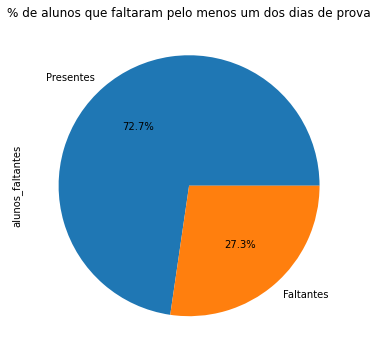

In [ ]:
#plotando as informacoes

plt.figure(figsize=(8,6))
plt.title('% de alunos que faltaram pelo menos um dos dias de prova')
dados['alunos_faltantes'].value_counts().plot.pie(labels=['Presentes','Faltantes'],autopct='%1.1f%%')

De acordo com a amostra, observamos que **27% dos alunos inscritos faltam alguma das provas**.


**Quantos faltam nos dois dias e quantos faltam em apenas um?**

Para encontrar esse número, vamos filtrar os `alunos_faltantes` e identificar se faltou em um ou em ambos os dias. A variável `alunos_faltantes_2_dias` pode ser interpretada da seguinte forma: se for igual a 1, o estudante faltou apenas um dos dias. Se for igual a 0, faltou nos dois.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


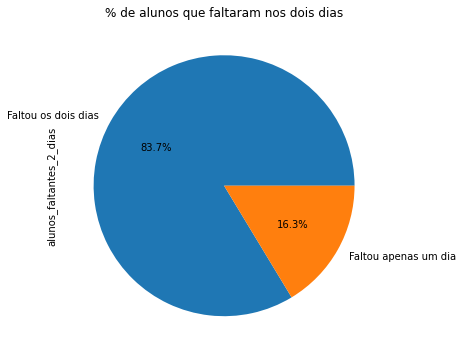

In [ ]:
# filtrando apenas os alunos faltantes e excluindo os alunos eliminados para simplificar a análise
dados_apenas_faltantes = dados.query('alunos_faltantes == 1 and TP_PRESENCA_LC != 2')

# criando uma variável para alunos que faltam nos dois dias
dados_apenas_faltantes['alunos_faltantes_2_dias'] = dados_apenas_faltantes['TP_PRESENCA_CN'] + dados_apenas_faltantes['TP_PRESENCA_LC']

# plotando as informacoes
plt.figure(figsize=(8,6))
plt.title('% de alunos que faltaram nos dois dias')
dados_apenas_faltantes['alunos_faltantes_2_dias'].value_counts().plot.pie(labels=['Faltou os dois dias','Faltou apenas um dia'],autopct='%1.1f%%')

Dos alunos que faltaram, **a grande maioria não compareceram nos dois dias,  representando 84% dos faltantes**. Os outros 16% faltaram apenas um dia. Podemos também verificar qual dia foi esse:

In [ ]:
# verificando a presenca por prova
dados_apenas_faltantes[['TP_PRESENCA_LC','TP_PRESENCA_CN']].value_counts(normalize=True)

TP_PRESENCA_LC  TP_PRESENCA_CN
0               0                 0.836569
1               0                 0.157286
0               1                 0.006145
dtype: float64

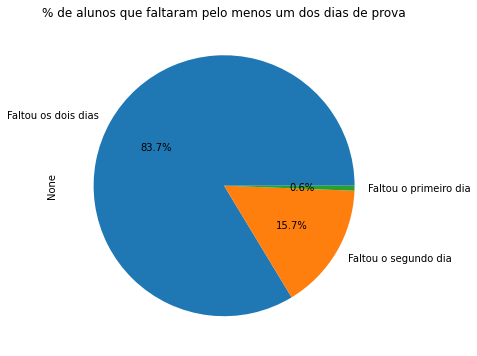

In [ ]:
# plotando as informacoes
plt.figure(figsize=(8,6))
plt.title('% de alunos que faltaram pelo menos um dos dias de prova')

dados_apenas_faltantes[['TP_PRESENCA_LC','TP_PRESENCA_CN']].value_counts(normalize=True).plot.pie(labels=['Faltou os dois dias','Faltou o segundo dia','Faltou o primeiro dia'],
                                                                                                  autopct='%1.1f%%')

Já que é muito pequeno o número de quem falta o primeiro dia e comparece no segundo, contra quase 16% que comparecem no primeiro dia e faltam no segundo, parece que, **raramente, quem falta o primeiro dia comparece no segundo - menos de 1%, mais precisamente.**

##2.  Onde vivem?

**Em quais Estados moram os faltantes?**

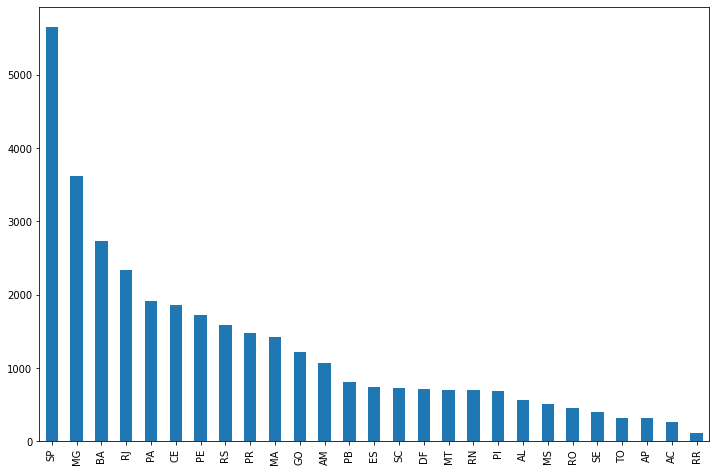

In [ ]:
# plotando o Estado de residencia
dados_apenas_faltantes['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize=(12,8))

**A maioria dos faltantes mora em SP**, mas normalmente também temos mais alunos inscritos de SP por conta do tamanho da população do Estado. Para ajudar a entender melhor se pode existir influencia da localização no não comparecimento, vamos olhar a proporção de alunos faltantes por Estado:

In [ ]:
# explorando os dados de alunos faltantes por estado
dados.groupby(['SG_UF_RESIDENCIA'])['alunos_faltantes'].value_counts(normalize=True).sort_values()

SG_UF_RESIDENCIA  alunos_faltantes
PB                1                   0.219512
SE                1                   0.224242
PI                1                   0.224786
RN                1                   0.238932
AL                1                   0.248343
PE                1                   0.248811
CE                1                   0.253082
MA                1                   0.256901
PA                1                   0.268061
TO                1                   0.268251
MG                1                   0.268694
BA                1                   0.274104
SC                1                   0.274598
RJ                1                   0.277666
AC                1                   0.279070
SP                1                   0.279955
PR                1                   0.281612
GO                1                   0.287723
RS                1                   0.290340
ES                1                   0.292157
DF                1      

Os estados que aparecem no topo da lista, ou seja, que tem **a menor proporção de alunos faltantes são todos do Nordeste: Paraíba (PB), Sergipe (SE), Piauí (PI), Rio Grande do Norte (RN), Alagoas (AL), Pernambuco (PE), Ceará (CE) e Maranhão (MA) tem porcentagens de alunos faltantes inferiores à 25%.**

Text(0.5, 1.0, 'Proporção de faltantes por estado')

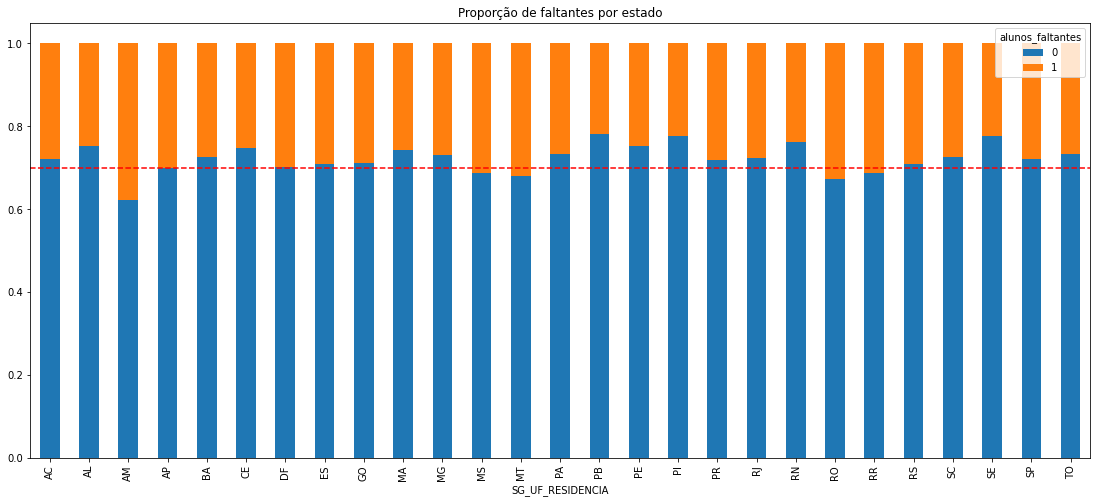

In [ ]:
# criando uma variavel de proporcao
proporcao_faltantes_por_estado = dados.groupby(['SG_UF_RESIDENCIA','alunos_faltantes'])['SG_UF_RESIDENCIA'].count()/dados.groupby('SG_UF_RESIDENCIA')['SG_UF_RESIDENCIA'].count()

# plotando as informacoes
proporcao_faltantes_por_estado.unstack().plot(kind='bar',stacked=True,figsize=(19, 8))
plt.axhline(y=0.70, color='red', linestyle='--')
plt.title("Proporção de faltantes por estado")

Com o auxílio da linha de referência, é possível observar que **6 estados tem mais de 30% de inscritos faltantes: Amapá (AP), Amazonas (AM), Mato Grosso do Sul (MS), Mato Grosso (MT), Rondônia (RO) e Roraima (RR). O AM tem a maior proporção do Brasil, com quase 38% de alunos faltantes.** Podemos elaborar algumas hipóteses aqui: é possível que exista um desafio logístico maior nessas localidades? como os estados podem melhorar o acesso dos alunos?

**Os alunos fazem prova na mesma na mesma cidade onde moram?**

Vamos tentar entender se ter que se deslocar para outro município para fazer a prova pode ter influência. Para isso, vou criar a variável `municipios_diferentes`: se o aluno se inscreveu para fazer a prova em um município diferente de onde mora, `municipios_diferentes` será igual a 1. Se a residencia e o local de prova forem no mesmo municipio, será igual a 0.

In [ ]:
# criando uma variável que avalia se o aluno fez a prova na mesma cidade onde mora
dados['municipios_diferentes'] = np.where(dados["NO_MUNICIPIO_PROVA"] != dados["NO_MUNICIPIO_RESIDENCIA"], 1, 0)
dados[['NO_MUNICIPIO_PROVA',"NO_MUNICIPIO_RESIDENCIA",'municipios_diferentes']]

,NO_MUNICIPIO_PROVA,NO_MUNICIPIO_RESIDENCIA,municipios_diferentes
0,Redenção,Redenção,0
1,Marabá,Marabá,0
2,Belém,Belém,0
3,São Félix do Xingu,São Félix do Xingu,0
4,Ananindeua,Ananindeua,0
...,...,...,...
127375,Cocos,Montalvânia,1
127376,Barra da Estiva,Barra da Estiva,0
127377,Salvador,Salvador,0
127378,Simões Filho,Simões Filho,0


In [ ]:
dados.groupby(['alunos_faltantes'])['municipios_diferentes'].value_counts(normalize=True)

alunos_faltantes  municipios_diferentes
0                 0                        0.833008
                  1                        0.166992
1                 0                        0.823678
                  1                        0.176322
Name: municipios_diferentes, dtype: float64

Olhando os dados acima, as proporções sobre fazer a prova em um município diferente não parecem variar muito entre os que estavam presente e os que faltaram. Para facilitar, vamos olhar graficamente:

Text(0.5, 1.0, 'Proporção de faltantes por estado')

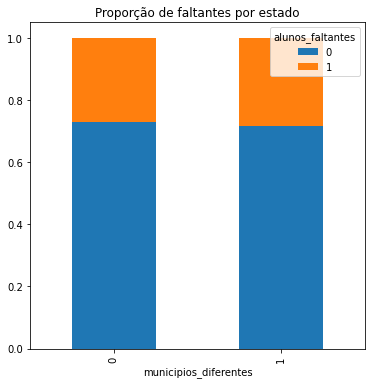

In [ ]:
# criando uma variavel de proporcao de municipios diferentes
proporcao_municipios_diferentes = dados.groupby(['municipios_diferentes','alunos_faltantes'])['municipios_diferentes'].count()/dados.groupby('municipios_diferentes')['municipios_diferentes'].count()

# plotando as informacoes
proporcao_municipios_diferentes.unstack().plot(kind='bar',stacked=True,figsize=(6, 6))
plt.title("Proporção de faltantes por estado")

**Fazer a prova em uma cidade diferente de onde reside não parece influenciar na presença ou atraso do aluno**, já que as proporções para os alunos presentes e faltantes são muito próximas.

##3. De que se alimentam?

Ok, a gente não vai conseguir saber os estudantes almoçaram no dia da prova. Mas existe algo extramamente importante de saber (e que, infelizmente, pode ter influencia na alimentação das pessoas): vamos olhar agora para a **renda familiar dos estudantes**.

A renda familiar foi a pergunta Q006 do formulário de inscrição e classificou os estudantes nas faixas de renda abaixo, iniciando em 'A' (sem nenhuma renda) até 'Q' (mais de R$ 19.960,00):

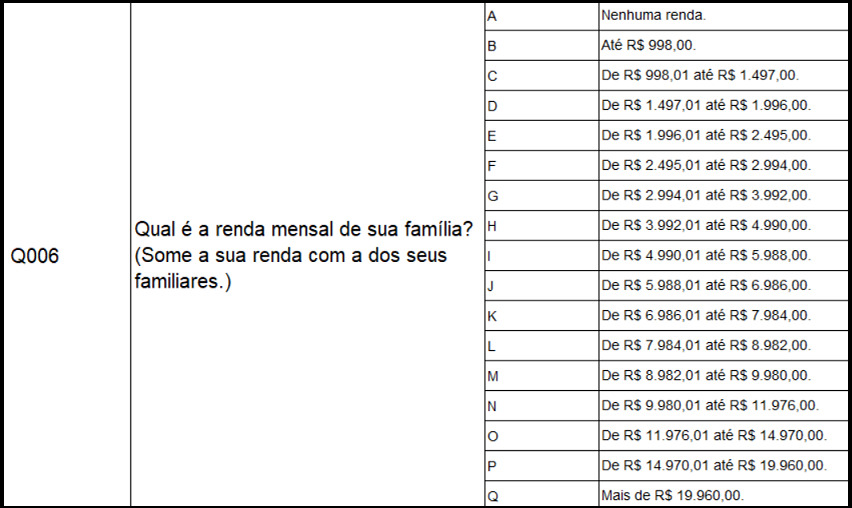

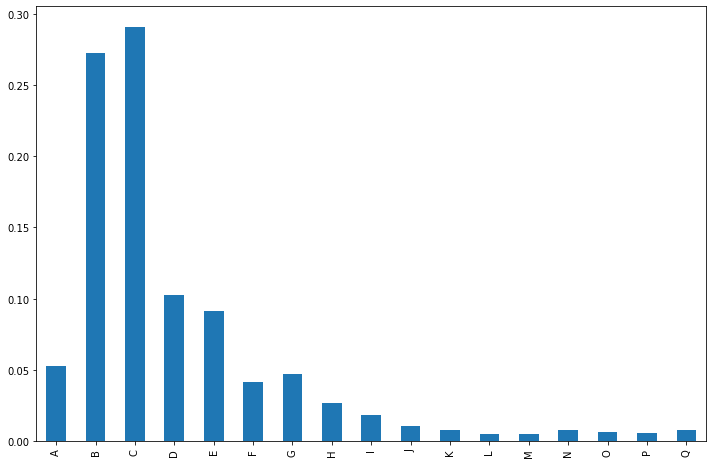

In [ ]:
# verificando a renda familiar
dados_apenas_faltantes['Q006'].value_counts(normalize=True).sort_index().plot.bar(figsize=(12,8))

**A maioria dos alunos faltantes está entre B e C, ou seja, tem renda familiar inferior à R$ 1.497**. Para levar em consideração a quantidade de inscritos por renda, da mesma forma que fizemos com os Estados, vamos ver a proporção de atrasados em cada faixa de renda:

In [ ]:
# ordenando a renda para utilizar no gráfico
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

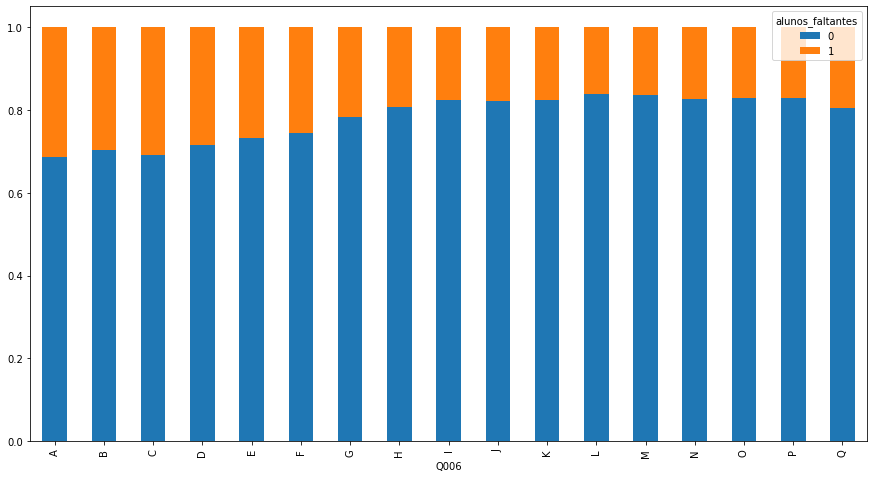

In [ ]:
# criando uma variavel de proporcao por renda
proporcao_faltantes_por_renda = dados.groupby(['Q006','alunos_faltantes'])['Q006'].count()/dados.groupby('Q006')['Q006'].count()

# plotando as informacoes
proporcao_faltantes_por_renda.unstack().plot(kind='bar',stacked=True,figsize=(15, 8))

**A quantidade de faltantes claramente diminui conforme a renda aumenta.** Alguma dúvida de que, quando analisamos o não comparecimento dos estudantes no Enem, podemos estar diante de mais um número que evidencia a desigualdade do país?

## Conclusões

Existem histórias das mais inusitadas sobre os atrasados do Enem, como as mostradas nessa campanha da Pravaler chamada ["A Verdadeira História dos Atrasados do Enem"](https://exame.com/marketing/campanha-traz-historias-reais-de-quem-perdeu-prova-do-enem/). No entanto, os números não são apenas aleatórios e mostram alguns padrões que evidenciam a desigualdade do país, já que **o lugar onde vivem e a renda familiar dos estudantes podem os deixar mais suscetíveis a não realizar a prova**.



Com esse estudo, pudemos observar que:

*   A maioria dos alunos que faltam, faltam os dois dias. Dificilmente quem perde o primeiro dia comparece no segundo.
*   Enquanto a maioria dos estados do Nordeste tem menos de 25% de alunos faltantes, alguns estados no Norte e Centro-Oeste passam de 30%. No Amazonas chega a 38%, a maior proporção de faltantes do país.
*   Mais da metade dos alunos que não comparecem à prova tem renda inferior à R$ 1.497,00.

## Ideias para estudos futuros

Conforme os números dessa análise foram aparecendo, eu me fiz várias perguntas, especialmente em relação ao futuro. É possível utilizar essas informações para melhorar os exames que estão por vir?

Aproveito para elencar algumas dessas perguntas aqui:



*   É possível prever a quantidade de alunos que não fará a prova presencial do Enem 2020?
*   A prova digital aproxima ou afasta os alunos que estão mais suscetíveis a não realizar a prova?

